# Imports and install Libs

In [1]:
import unified_ar as ar
ar.reload()
import os
while "datasets" not in os.listdir():
    os.chdir("..")
# import unified_ar.general.libinstall
from unified_ar.constants import methods
import pandas as pd
import numpy as np
from ipywidgets import interact,interact_manual

Please install GPU version of TF
Please install GPU version of TF


# Loading Dataset

In [4]:
@interact(dataset={d['method']().data_dscr:i for i,d in enumerate(methods.dataset)})
def dataset_select(dataset=0):
    global datasetdscr
    datasetdscr=methods.dataset[dataset]['method']().load()
    # datasetdscr = methods.dataset[2m]['method']().load()
    print(f'dataset {datasetdscr.data_dscr} loaded')
    datasetdscr.activities_map

interactive(children=(Dropdown(description='dataset', options={'Home1': 0, 'Home2': 1, 'Aruba': 2, 'KaryoAdlNo…

# Visualize DataSet

Please install GPU version of TF
sensor events:


,SID,time,value
20,M003,2010-11-04 03:42:21.823650,1.0
21,T002,2010-11-04 03:42:25.128495,20.0
22,M003,2010-11-04 03:42:25.939730,0.0
23,M003,2010-11-04 03:49:52.412755,1.0
24,M003,2010-11-04 03:49:57.473649,0.0


activity_events:


,StartTime,EndTime,Activity,Duration
1,2010-11-04 05:40:51.303739,2010-11-04 05:43:30.279021,1,0 days 00:02:38.975282


sensor_desc:


,ItemName,Cumulative,Nominal,OnChange,ItemRange,Location,Object,SensorName
ItemId,,,,,,,,
D002,D002,0,1,1,"{'range': ['CLOSE', 'OPEN']}",None,None,None
D004,D004,0,1,1,"{'range': ['CLOSE', 'OPEN']}",None,None,None


Activites:  ['None' 'Bed_to_Toilet' 'Eating' 'Enter_Home' 'Housekeeping' 'Leave_Home'
 'Meal_Preparation' 'Relax' 'Respirate' 'Sleeping' 'Wash_Dishes' 'Work']
0 None 	--> count= 0  avg duration= NaT
1 Bed_to_Toilet 	--> count= 156  avg duration= 0 days 00:02:43.768858160
2 Eating 	--> count= 255  avg duration= 0 days 00:10:08.956068960
3 Enter_Home 	--> count= 427  avg duration= 0 days 00:00:06.756965461
4 Housekeeping 	--> count= 33  avg duration= 0 days 00:20:19.441076818
5 Leave_Home 	--> count= 427  avg duration= 0 days 00:00:06.366905384
6 Meal_Preparation 	--> count= 1596  avg duration= 0 days 00:07:50.569201409
7 Relax 	--> count= 2907  avg duration= 0 days 00:33:26.497770572
8 Respirate 	--> count= 6  avg duration= 0 days 00:08:33.858463500
9 Sleeping 	--> count= 398  avg duration= 0 days 04:01:21.525095457
10 Wash_Dishes 	--> count= 64  avg duration= 0 days 00:07:14.767501593
11 Work 	--> count= 171  avg duration= 0 days 00:17:04.827750087


/home/abc/unified_ar/unified_ar/datatool/dataset_viewer.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  activity_events['Activity'].loc[activity_events['Activity'] == a] = v


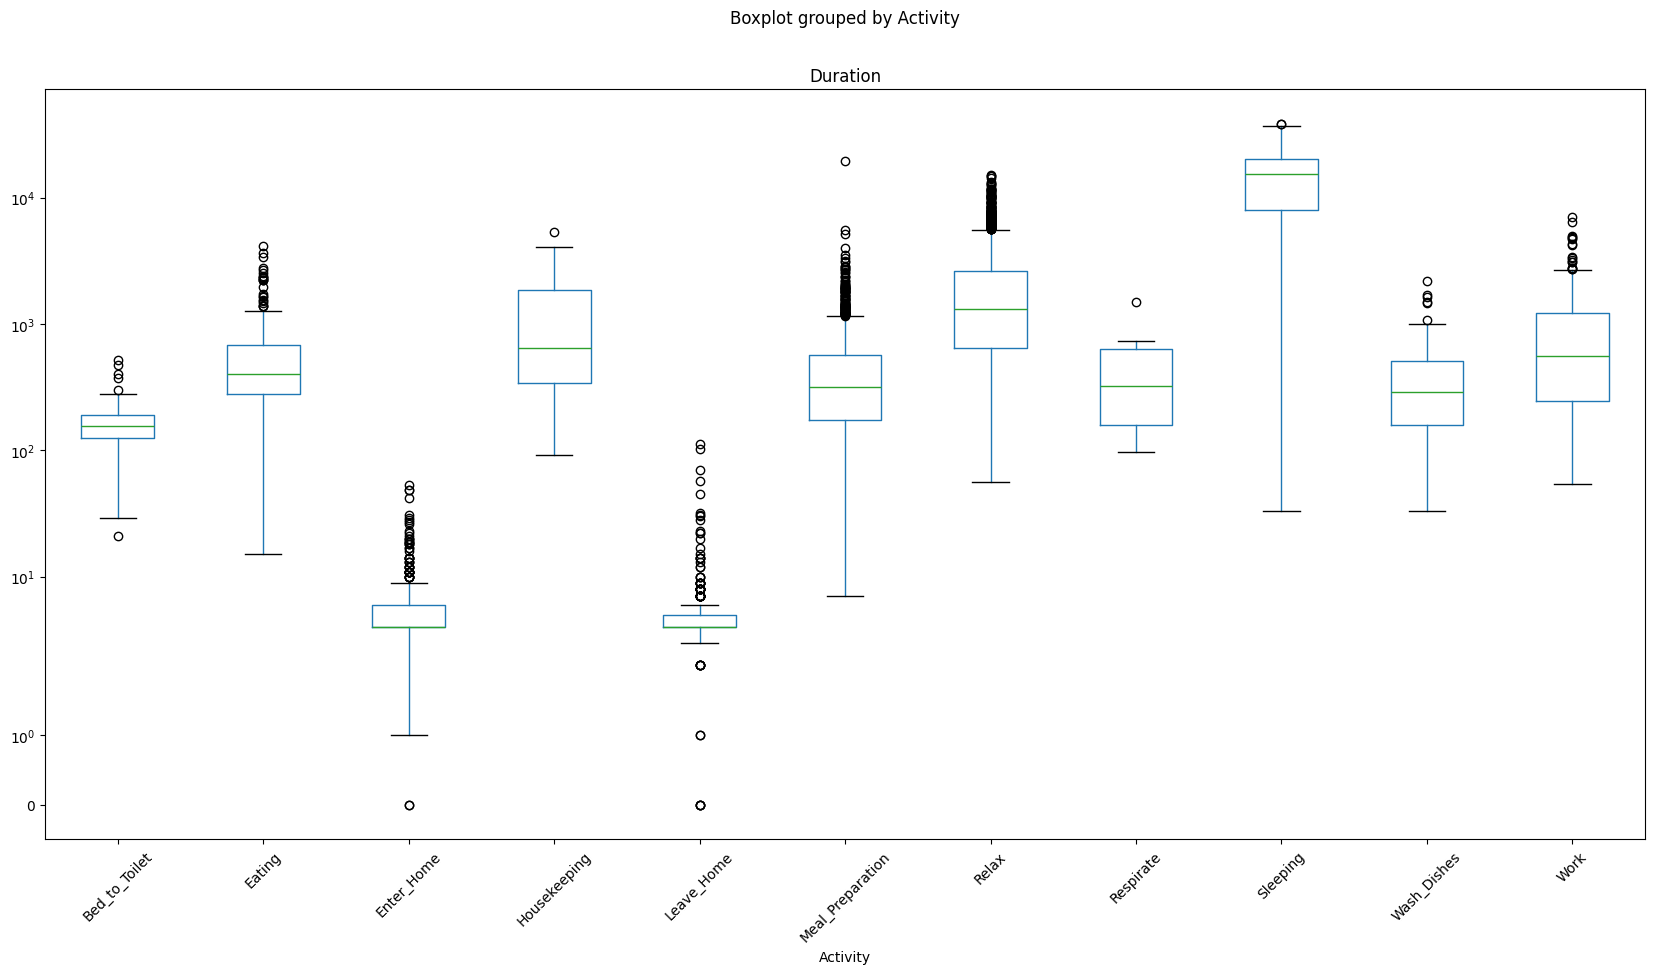

In [5]:
import unified_ar as ar
ar.reload()
from unified_ar.datatool import dataset_viewer as dv

dv.displaycontent(datasetdscr)


Please install GPU version of TF
sensor hitmap on begin, middle and end


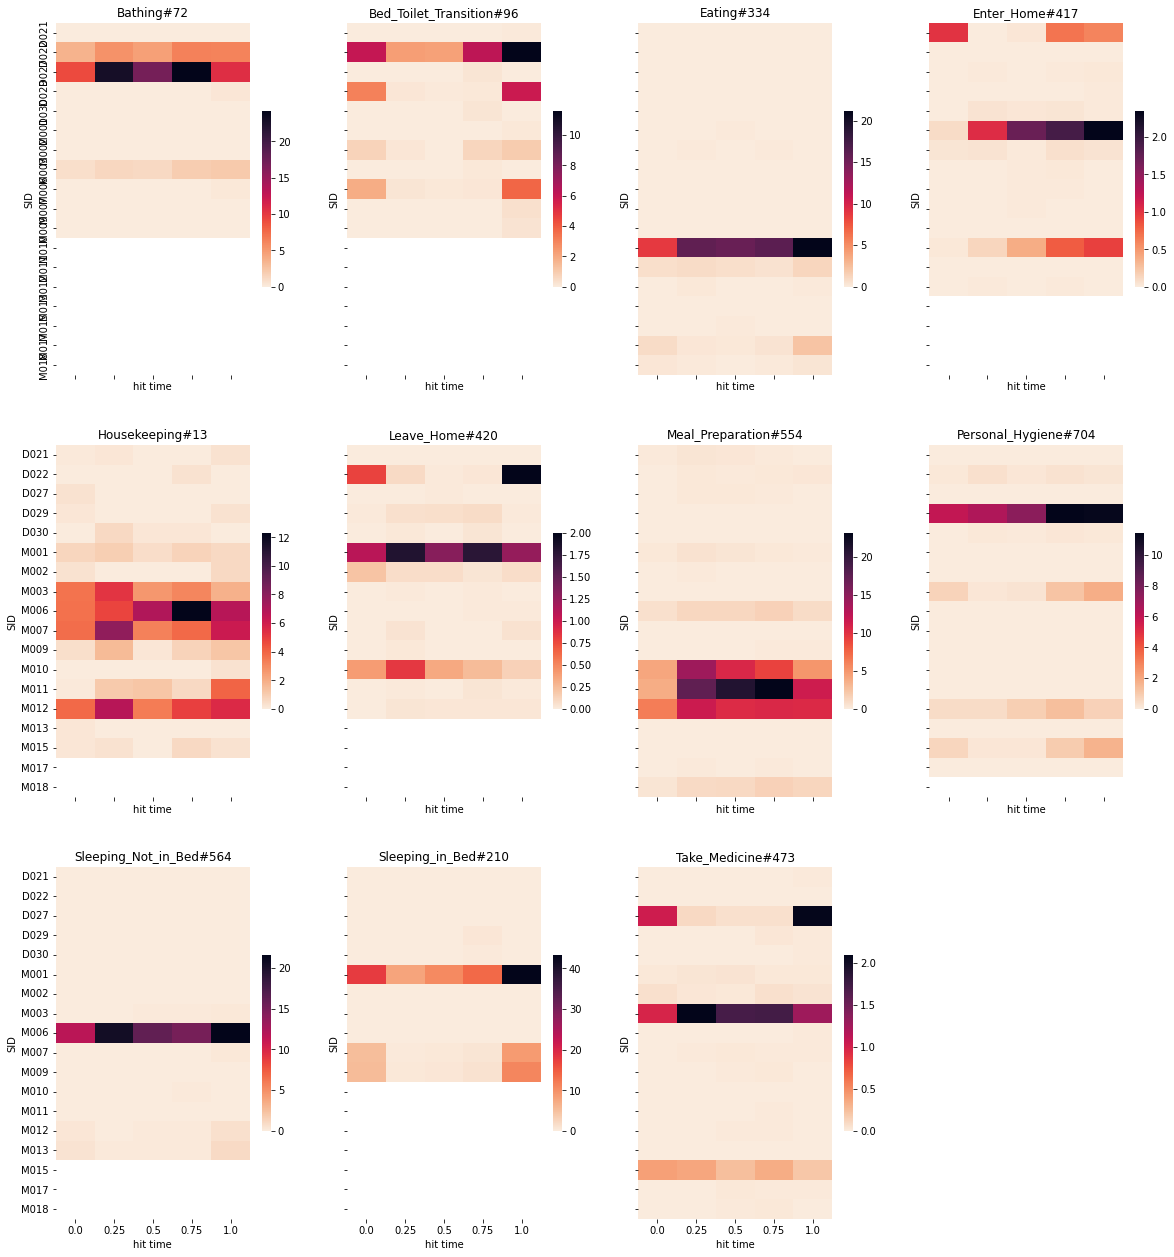

In [4]:
ar.reload()

# for act in datasetdscr.activities_map:
# 	result_analyse.dataset_viewer.view(datasetdscr,act)
dv.sensor_hitmap(datasetdscr)
print('sensor hitmap on begin, middle and end')

In [5]:
ar.reload()
# for act in datasetdscr.activities_map:
dv.plotAct(datasetdscr,datasetdscr.activity_events)

Please install GPU version of TF


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Train Test Builder

In [6]:
ar.reload()
evalmethod=ar.evaluation.SplitEval.SplitEval()
evalmethod.dataset=datasetdscr
Train,Test=evalmethod.makeTrainTest(datasetdscr.sensor_events,datasetdscr.activity_events)
Train.acts=list(datasetdscr.activities_map.keys())
Test.acts=list(datasetdscr.activities_map.keys())
Train.act_map=datasetdscr.activities_map
Test.act_map=datasetdscr.activities_map

Please install GPU version of TF


# PreProcessing

In [7]:
ar.reload()
preprocessing=methods.preprocessing[0]['method']()
TrainData=preprocessing.process(datasetdscr,Train)
TestData=preprocessing.process(datasetdscr,Test)

Please install GPU version of TF


# Segmentation

In [76]:
ar.reload()
methods=ar.constants.methods
@interact_manual(segmentation={v['method']().shortname() + ' ' + (str(v['params']) if 'params' in v and len(v['params']) > 0 else ''): k for k, v in enumerate(methods.segmentation)})
def segmentation_process(segmentation=0):
    global Strain,Stest
    # utils.reload()
    prepare_segment2=ar.segmentation.segmentation_abstract.prepare_segment2
    func=ar.Data('func');func.ui_debug={'seg':1};segindx=segmentation
    func.acts=TrainData.acts
    func.segmentor=methods.segmentation[segindx]['method']()
    func.segmentor.applyDefParams(methods.segmentation[segindx]['params'])
    func.activityFetcher=methods.activity_fetcher[0]['method']()  
    Strain=prepare_segment2(func,TrainData,datasetdscr,train=True)
    Stest=prepare_segment2(func,TestData,datasetdscr,train=False)
    print('Segmentation Finished %d Train segment %d Test segment created %s' % (len(Strain.set_window),len(Stest.set_window), func.segmentor.shortname()))

Please install GPU version of TF


interactive(children=(Dropdown(description='segmentation', options={"FixedEventWindow [{'size': 120}, {'shift'…

# Meta Dataset: only available for SWMeta 

In [4]:
# meta_dataset=utils.loadState(f'meta_dataset/{methods.run_names["out"]}_0')
# import unified_ar.general.utils as utils
# import pandas as pd
# meta_dataset=utils.loadState(f'meta_dataset/220816_08-30-22-Home1-s=1 0')
# meta_dataset['meta_targets']=pd.DataFrame(meta_dataset['meta_targets'])
# meta_dataset['meta_features']=pd.DataFrame(meta_dataset['meta_features'])
display(meta_dataset['meta_features'])
display(meta_dataset['meta_targets'])

,D021,D022,D023,D024,D025,D026,D027,D028,D029,D030,...,M012,M013,M014,M015,M016,M017,M018,M019,M020,time
0,0,0,0,0,0,0,0,0,0,0,...,20,0,0,0,0,2,6,10,8,2009-08-03
1,2,8,2,0,2,4,2,0,12,30,...,82,24,0,432,12,126,204,64,116,2009-08-04
2,2,6,2,1,0,6,10,2,24,32,...,72,14,12,248,8,90,188,36,20,2009-08-05
3,2,6,6,1,0,4,12,0,24,12,...,96,10,0,336,2,84,140,40,36,2009-08-06
4,6,6,4,0,0,10,4,4,22,32,...,96,102,4,344,32,116,362,48,42,2009-08-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,8,8,6,0,0,8,12,6,32,30,...,274,4,28,658,56,292,344,132,154,2009-11-04
94,4,0,2,0,0,4,2,0,24,22,...,352,0,0,330,46,286,320,70,136,2009-11-05
95,6,4,2,0,0,4,10,0,18,26,...,428,92,8,692,206,448,562,162,226,2009-11-06
96,6,2,4,0,0,6,10,4,38,22,...,380,12,18,430,62,264,304,120,156,2009-11-07


,method,accuracy,precision,recall,f1,size,shift
0,FixedEventWindow,0.00,0.00,0.00,0.00,25.0,15.0
1,Probabilistic,0.02,0.03,0.05,0.01,NaN,NaN
2,FixedEventWindow,0.00,0.11,0.15,0.11,15.0,15.0
3,FixedSlidingWindow,0.00,0.11,0.10,0.11,15.0,15.0
4,FixedSlidingWindow,0.49,0.74,0.78,0.72,30.0,30.0
...,...,...,...,...,...,...,...
93,FixedEventWindow,0.00,0.00,0.00,0.00,25.0,15.0
94,Probabilistic,0.01,0.00,0.03,0.01,NaN,NaN
95,FixedEventWindow,0.01,0.14,0.13,0.13,15.0,15.0
96,FixedEventWindow,0.02,0.22,0.22,0.22,10.0,10.0


# Feature Extraction

In [65]:
# ar.reload()
@interact_manual(feature_ex={v['method']().shortname() + ' ' + (str(v['params']) if 'params' in v and len(v['params']) > 0 else ''): k for k, v in  enumerate(methods.feature_extraction)})
def feature_extraction_process(feature_ex=0):
    ar.reload()
    featureExtraction=ar.feature_extraction.feature_abstract.featureExtraction
    feat=methods.feature_extraction[feature_ex]
    featureExtractor=feat['method']()
    featureExtractor.applyDefParams(feat['params'])
    Strain.set=featureExtraction(featureExtractor,datasetdscr,Strain,istrain=True)
    Stest.set =featureExtraction(featureExtractor,datasetdscr,Stest,istrain=False)
    print('FeatureExtraction Finished train shape %s , test shape %s , %s' % (str(Strain.set.shape),str(Stest.set.shape), featureExtractor.shortname()))


interactive(children=(Dropdown(description='feature_ex', options={"SensorWord [{'vocab_size': 1000}]": 0, "Rec…

# Feature Importance 
(not usable for SensorWord)

important feature in train set


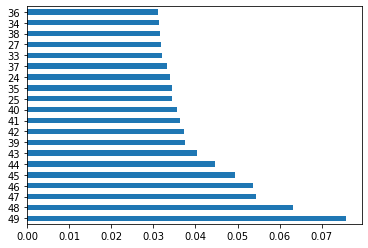

without cheating it should be similar in test set


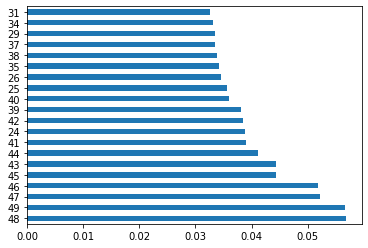

In [25]:
def plotFeatureImportance(dataset):
	from sklearn.ensemble import ExtraTreesClassifier
	import matplotlib.pyplot as plt
	X=pd.DataFrame(dataset.set)
	y=dataset.label
	model = ExtraTreesClassifier()
	model.fit(X,y)
	# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
	#plot graph of feature importances for better visualization
	feat_importances = pd.Series(model.feature_importances_, index=X.columns)
	feat_importances.nlargest(20).plot(kind='barh')
	plt.show()

print('important feature in train set')
plotFeatureImportance(Strain)
print('without cheating it should be similar in test set')
plotFeatureImportance(Stest)

# Features Correlation 
(not usable for SensorWord)

In [20]:
import matplotlib.pyplot as plt
def dataCorr(dataset):
	import seaborn as sns
	data=pd.DataFrame(dataset.set)
	corrmat = data.corr()
	top_corr_features = corrmat.index
	plt.figure(figsize=(20,20))
	#plot heat map
	g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
	plt.show()

print('data correlation in train set')
dataCorr(Strain)
print('without cheating, it should be similar, data correlation in test set')
dataCorr(Stest)

data correlation in train set


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 2000x2000 with 0 Axes>

# Classifier

In [77]:
ar.reload()
@interact_manual(classifier_method={d['method']().shortname():i for i,d in enumerate(methods.classifier)})
def segmentation_process(classifier_method=0):
	global classifier	
	cmethod=classifier_method
	classifier=methods.classifier[cmethod]['method']()
	classifier.applyDefParams(methods.classifier[cmethod]['params'])
	classifier.createmodel(Strain.set[0].shape,len(Strain.acts),update_model=0)
	classifier.setWeight(None)
	print('Classifier model created  %s' % (classifier.shortname()))
	classifier.train(Strain.set, Strain.label) 
	print('Classifier model trained  %s' % (classifier.shortname()))

Please install GPU version of TF


interactive(children=(Dropdown(description='classifier_method', options={'CNN_LSTM': 0, 'FCN': 1, 'FCNEmbedded…

# Results

In [ ]:
train_predicted        =classifier.predict(Strain.set)
train_predicted_classes=classifier.predict_classes(Strain.set)    

test_predicted        =classifier.predict(Stest.set)
test_predicted_classes=classifier.predict_classes(Stest.set)


# display classic metrics

In [ ]:
ar.reload()
from matplotlib.pylab import plt
import unified_ar.result_analyse.visualisation as vs
from unified_ar.metric.CMbasedMetric import CMbasedMetric
from sklearn.metrics  import confusion_matrix

train_cm=confusion_matrix(Strain.label,train_predicted_classes)
test_cm=confusion_matrix(Stest.label,test_predicted_classes)
activities=datasetdscr.activities
remove_none=False
if remove_none:
    train_cm=train_cm[1:,1:]
    test_cm=test_cm[1:,1:]
    activities=datasetdscr.activities[1:]

fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train weighted avg',CMbasedMetric(train_cm,'weighted'));
print('train micro avg',CMbasedMetric(train_cm,'micro'));
print('train macro avg',CMbasedMetric(train_cm,'macro'));



vs.plot_CM_normal(test_cm,datasetdscr.activities,title='test cm',ax=axs[1])
print('test weighted avg',CMbasedMetric(test_cm,'weighted'));
print('test micro avg',CMbasedMetric(test_cm,'micro'));
print('test macro avg',CMbasedMetric(test_cm,'macro'));
        

# Combiner

Please install GPU version of TF
train events merged  EmptyCombiner2
test events merged  EmptyCombiner2
visualizing real and pred1
visualizing real and pred1


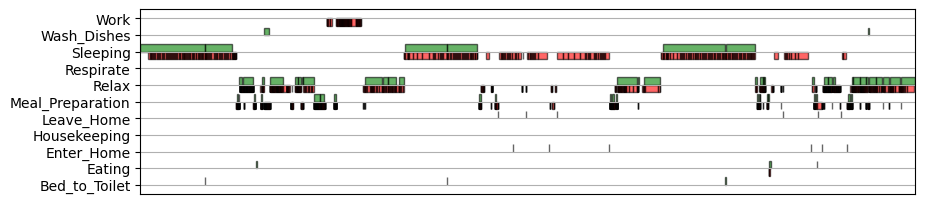

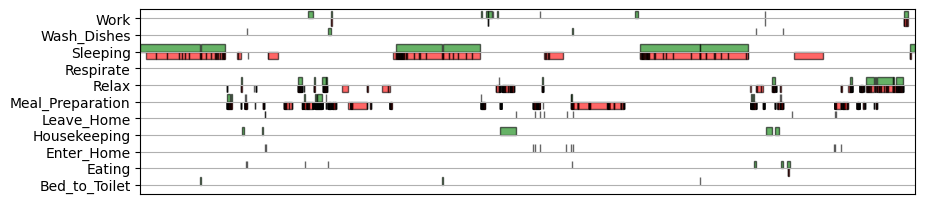

In [80]:
ar.reload()
import unified_ar.combiner.SimpleCombiner
combiner=methods.combiner[0]['method']()
train_pred_events      =combiner.combine(Strain.s_event_list,Strain.set_window,train_predicted)
print('train events merged  %s' % (combiner.shortname()))
test_pred_events      =combiner.combine(Stest.s_event_list,Stest.set_window,test_predicted)
print('test events merged  %s' % (combiner.shortname()))
import unified_ar.result_analyse.visualisation as vs

vs.plot_joint_events(datasetdscr, Train.a_events, train_pred_events)
vs.plot_joint_events(datasetdscr, Test.a_events, test_pred_events)

# TS CM

Please install GPU version of TF
[12:11:31] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0xfffe8f134fd0>
train weighted avg {'accuracy': 0.735, 'precision': 0.5845, 'recall': 0.735, 'f1': 0.6457}
train micro avg {'accuracy': 0.735, 'precision': 0.735, 'recall': 0.735, 'f1': 0.735}
train macro avg {'accuracy': 0.735, 'precision': 0.2961, 'recall': 0.3339, 'f1': 0.2943}
[12:11:31] colorbar.py _get_ticker_locator_formatter DEBUG    locator: <matplotlib.ticker.AutoLocator object at 0xfffed1e1f430>
test weighted avg {'accuracy': 0.6797, 'precision': 0.5161, 'recall': 0.6797, 'f1': 0.5767}
test micro avg {'accuracy': 0.6797, 'precision': 0.6797, 'recall': 0.6797, 'f1': 0.6797}
test macro avg {'accuracy': 0.6797, 'precision': 0.358, 'recall': 0.3338, 'f1': 0.2884}


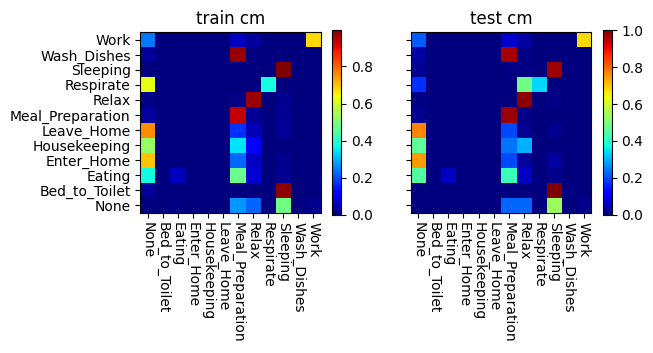

In [81]:
ar.reload()
from unified_ar.metric.CMbasedMetric import CMbasedMetric
from unified_ar.metric.event_confusion_matrix import event_confusion_matrix

train_event_cm     = event_confusion_matrix(Strain.a_events,train_pred_events,datasetdscr.activities)
test_event_cm      = event_confusion_matrix(Stest.a_events,test_pred_events,datasetdscr.activities)

activities=datasetdscr.activities
if remove_none:
    train_event_cm=train_event_cm[1:,1:]
    test_event_cm=test_event_cm[1:,1:]
    activities=datasetdscr.activities[1:]

    
fig,axs=plt.subplots(1,2,sharex=True,sharey=True)
vs.plot_CM_normal(train_event_cm,datasetdscr.activities,title='train cm',ax=axs[0])
print('train weighted avg',CMbasedMetric(train_event_cm,'weighted'));
print('train micro avg',CMbasedMetric(train_event_cm,'micro'));
print('train macro avg',CMbasedMetric(train_event_cm,'macro'));

vs.plot_CM_normal(test_event_cm,activities,title='test cm',ax=axs[1])
print('test weighted avg',CMbasedMetric(test_event_cm,'weighted'));
print('test micro avg',CMbasedMetric(test_event_cm,'micro'));
print('test macro avg',CMbasedMetric(test_event_cm,'macro'));




Please install GPU version of TF
{'method': {0: {'test': <unified_ar.common.data.Data object at 0xfffe911c8f10>}}}


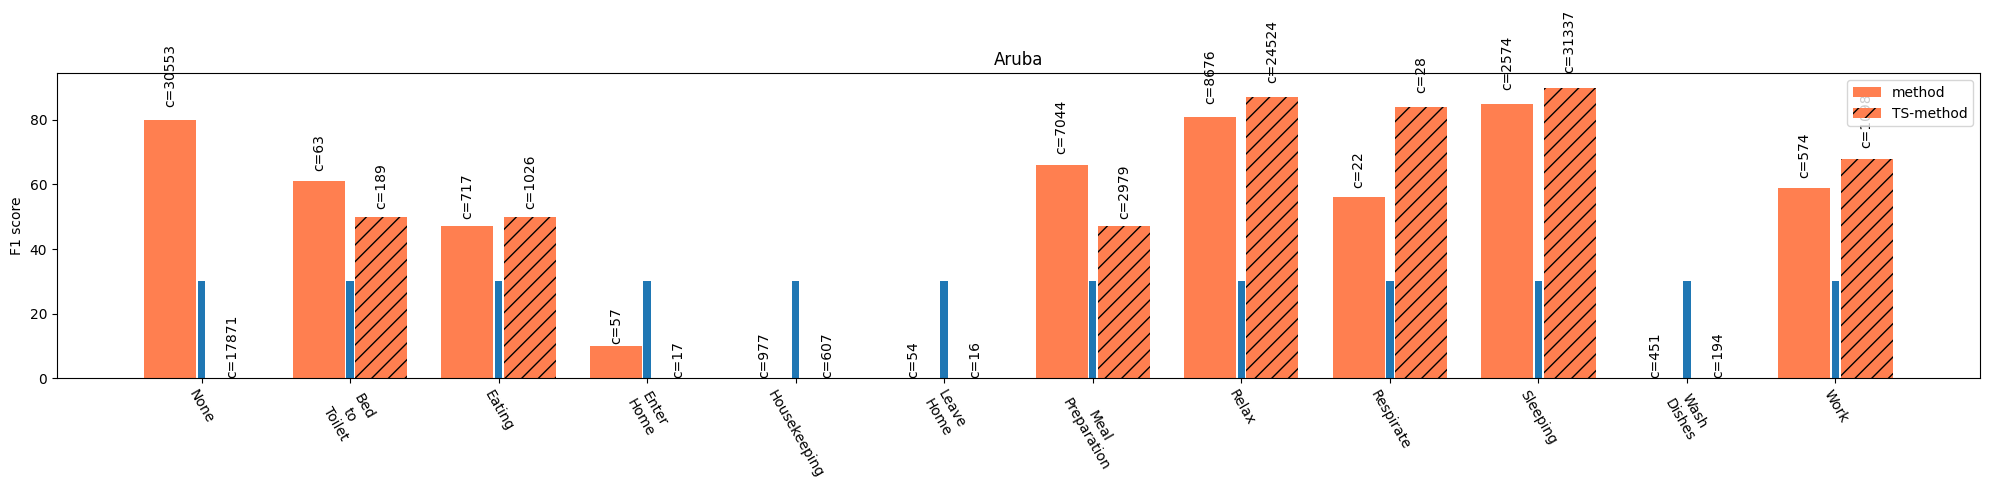

In [64]:
ar.reload()
import unified_ar.result_analyse.visualisation as vs


# vs.plot_per_act_cm(datasetdscr,train_cm,train_event_cm)
# import matplotlib.pyplot as plt
# plt.show()
vs.plot_per_act_cm(datasetdscr,test_cm,test_event_cm)